#**Dataset** details

Each image has a height of 28 pixels and a width of 28 pixels, for a total of 784 pixel. There is a single pixel-value correlated with each pixel, showing the pixel's lightness or darkness, with higher numbers suggesting darker. This pixel-value is an integer ranging from 0 to 255, inclusive. 

The data set for training, has 785 columns. The first column is the digit that was drawn by the individual, labeled "label". The remainder of the columns contain the corresponding picture pixel values.

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

digit_recognizer_data1 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Machine Learning/Project 1/digit-recognizer/train.csv")
digit_recognizer_data1.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [224]:
digit_recognizer_data1.shape

(42000, 785)

In [225]:
digit_recognizer_data = digit_recognizer_data1[:2000]
digit_recognizer_data.shape

(2000, 785)

In [226]:
X_digit_recognizer_data=digit_recognizer_data.drop(['label'],1).values
y_digit_recognizer_data=digit_recognizer_data['label'].values
X_digit_recognizer_data = X_digit_recognizer_data.astype("float32")
X_digit_recognizer_data = X_digit_recognizer_data / 255.0

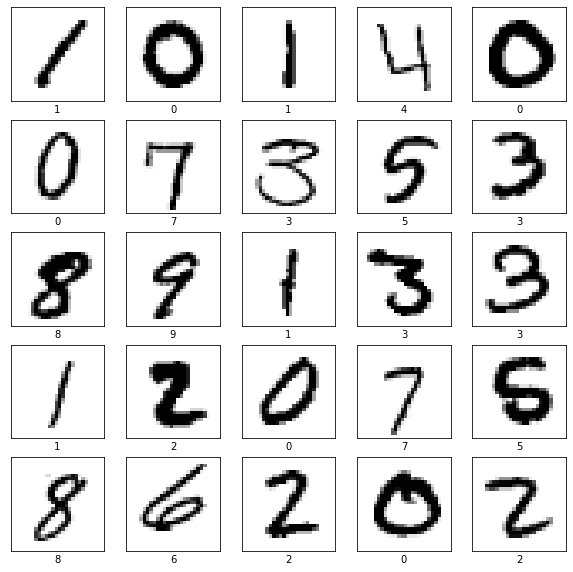

In [228]:
X = X_digit_recognizer_data.reshape(X_digit_recognizer_data.shape[0], 28, 28)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i], cmap=plt.cm.binary)
    plt.xlabel(y_digit_recognizer_data[i])
plt.show()

In [229]:
from sklearn.model_selection import train_test_split
from operator import itemgetter, attrgetter

X_train, X_test, y_train, y_test = train_test_split(X_digit_recognizer_data, y_digit_recognizer_data,test_size=0.2,random_state=0)

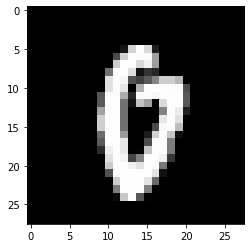

In [230]:
plt.imshow((X_train[7].reshape(28, 28)), cmap = 'gray')        # imshow is function to open the image
plt.show()

In [231]:
def Euclidean(x1, x2): #it is used for calculating euclidean distance
    distance = 0
    z = np.subtract(x1, x2)
    t = np.square(z)
    distance = np.sum(t)
    return np.sqrt(distance)

def knn(X_train,X_test,y_train,k):
  euc_distances = {}
  for x in range(len(X_train)):
      distance = Euclidean(X_train[x], X_test)
      euc_distances[x] = distance
  sortdist = sorted(euc_distances.items(), key=lambda x: x[1])
  #print(sortdist)
  neighbors = []
  for x in range(k):
      neighbors.append(sortdist[x][0])
  class_count = {} #to get most frequent class of rows
  for x in range(len(neighbors)):
      class_y = y_train[neighbors[x]]
      if class_y in class_count:
          class_count[class_y] += 1
      else:
          class_count[class_y] = 1
  sort_count = sorted(class_count.items(), key=lambda x: x[1], reverse=True)
  return sort_count[0][0]

def evaluate(y_pred,y_test):
  correct = 0
  for y_pred__,y_test__ in zip(y_pred,y_test):
    if y_pred__== y_test__:
      correct +=1
  return correct/len(y_test)

In [232]:
import time
start = time.time()
y_pred = []
for data in X_test:
  z = knn(X_train,data,y_train,k=7)
  y_pred.append(z)

v = evaluate(y_pred,y_test)
end = time.time()
print(v)
print(f"Runtime of the program is {end - start}")

0.86
Runtime of the program is 6.669517517089844


In [233]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report


Confusion Matrix


Text(0.5, 15.0, 'Predicted label')

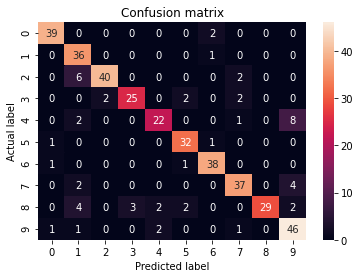

In [234]:
print("Confusion Matrix")
c_matrix = confusion_matrix(y_test,y_pred)
pd.crosstab(np.array(y_test), np.array(y_pred), rownames=['Actual'], colnames=['Predicted'], margins=True)
p = sns.heatmap(pd.DataFrame(c_matrix), annot=True,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [235]:
k_accuracy = []
k_val = []
for k in range(3,21,2):
  y_pred = []
  for data in X_test:
    pred = knn(X_train,data,y_train,k)
    y_pred.append(pred)
  c_matrix = confusion_matrix(y_test,y_pred)
  k_accuracy_score = (np.sum(np.diagonal(c_matrix)))/(np.sum(c_matrix[0])-c_matrix[0][0]+np.sum(c_matrix[:,0])-c_matrix[0][0]+np.sum(np.diagonal(c_matrix)))
  k_accuracy.append(k_accuracy_score)
  k_val.append(k)
print(k_val,k_accuracy)

[3, 5, 7, 9, 11, 13, 15, 17, 19] [0.9915730337078652, 0.9915014164305949, 0.9856733524355301, 0.9887640449438202, 0.9915254237288136, 0.9913544668587896, 0.9854227405247813, 0.9883040935672515, 0.9794721407624634]


K Values VS Accurracy for 0 label

Text(0.5, 0, 'K Values')

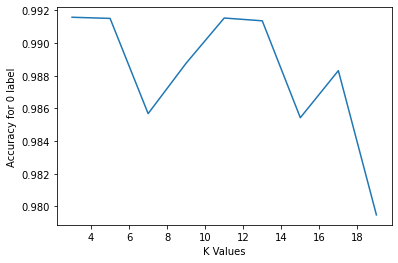

In [236]:
plt.plot(k_val, k_accuracy)
plt.ylabel('Accuracy for 0 label')
plt.xlabel('K Values')